In [111]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn import datasets

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif

from sklearn.feature_selection import SequentialFeatureSelector

In [22]:
pd.options.display.max_columns = None

In [15]:
df = datasets.fetch_covtype()

In [17]:
data = pd.DataFrame(df.data, columns=df.feature_names)
data['target'] = df.target
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [19]:
# Посмотрим на данные
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area_0                   581012 non-null  float64
 11  Wilderness_Area_1         

Пустых значений в нашем датафрейме нет, следовательно заполнение пропущенных значений не требуется.

In [24]:
data.shape

(581012, 55)

In [23]:
# Посмотрим на основные статистики наших данных
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Soil_Type_0,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [84]:
# Функция по расчету скора модели
def get_score(x,y, model=None):
    if model is None:
        model = DecisionTreeClassifier(max_depth=10)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)  
        model.fit(x_train, y_train)
        return model.score(x_test, y_test)

### Вариант 1. Отбор по корреляции признаков (на основе матрицы корреляции)

In [89]:
# Создадим словарь для сбора скоров
dict_score_corr = {}

<AxesSubplot:>

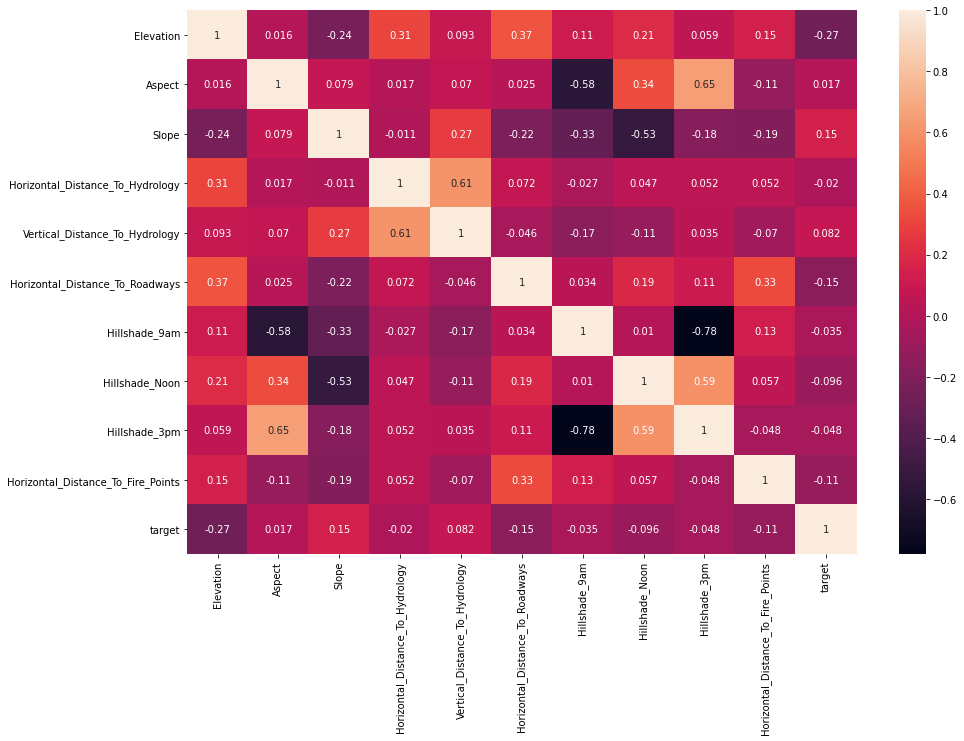

In [34]:
# Отберем не все признаки, чтобы лучше было видно на матрице корреляций
plt.figure(figsize = (15,10))
sns.heatmap(data[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
                 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 
                 'Horizontal_Distance_To_Fire_Points', 'target']].corr(), annot=True)

Высококй корреляции между признаками из матрицы корреляций не видно, поэтому не будем выкидывать признаки

In [44]:
cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_0',
       'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3',
       'Soil_Type_0', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3',
       'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7',
       'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11',
       'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15',
       'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19',
       'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23',
       'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27',
       'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31',
       'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35',
       'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39']

In [42]:
# Сделаем копию нашего датафрейма в data_new и удалим таргетную переменную
data_new = data.copy()
del data_new['target']

In [85]:
# Будем в цикле добавлять по 1-му признаку и считать скор
y = data['target']
col = []
for i in range (len(cols)):
    col.append(cols[i])
    dict_score_corr[i] = get_score(data_new[col],y)

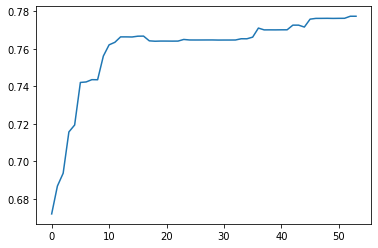

In [86]:
# График качества в зависимости от кол-ва признаков
plt.plot(dict_score_corr.values())

### Вариант 2. Отбор признаков на основе Information Value

In [ ]:
array = data.values
x = array[:,0:54] # dataframe --> массив numpy
y = array[:,54]

In [102]:
importance = mutual_info_classif(x,y)
for i in range(len(data.columns)-1):
    print(f"{data.columns[i]}\t- {importance[i]:.4f}")

Elevation	- 0.4568
Aspect	- 0.0203
Slope	- 0.0379
Horizontal_Distance_To_Hydrology	- 0.0239
Vertical_Distance_To_Hydrology	- 0.0171
Horizontal_Distance_To_Roadways	- 0.0880
Hillshade_9am	- 0.0322
Hillshade_Noon	- 0.0205
Hillshade_3pm	- 0.0210
Horizontal_Distance_To_Fire_Points	- 0.0698
Wilderness_Area_0	- 0.0808
Wilderness_Area_1	- 0.0136
Wilderness_Area_2	- 0.0164
Wilderness_Area_3	- 0.1471
Soil_Type_0	- 0.0129
Soil_Type_1	- 0.0236
Soil_Type_2	- 0.0137
Soil_Type_3	- 0.0274
Soil_Type_4	- 0.0067
Soil_Type_5	- 0.0195
Soil_Type_6	- 0.0000
Soil_Type_7	- 0.0000
Soil_Type_8	- 0.0006
Soil_Type_9	- 0.0654
Soil_Type_10	- 0.0068
Soil_Type_11	- 0.0245
Soil_Type_12	- 0.0107
Soil_Type_13	- 0.0040
Soil_Type_14	- 0.0004
Soil_Type_15	- 0.0000
Soil_Type_16	- 0.0056
Soil_Type_17	- 0.0036
Soil_Type_18	- 0.0016
Soil_Type_19	- 0.0011
Soil_Type_20	- 0.0000
Soil_Type_21	- 0.0243
Soil_Type_22	- 0.0224
Soil_Type_23	- 0.0058
Soil_Type_24	- 0.0000
Soil_Type_25	- 0.0018
Soil_Type_26	- 0.0003
Soil_Type_27	- 0.0005

In [107]:
# Отберем признаки со значением больше 0.1 + Wilderness_Area и посчитаем скор модели
cols_iv = ['Elevation', 'Wilderness_Area_0',
       'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3']

In [108]:
# Создадим словарь для сбора скоров
dict_score_iv = {}

In [109]:
# Будем в цикле добавлять по 1-му признаку и считать скор
y = data['target']
col_iv = []
for i in range (len(cols_iv)):
    col_iv.append(cols_iv[i])
    dict_score_iv[i] = get_score(data_new[col_iv],y)

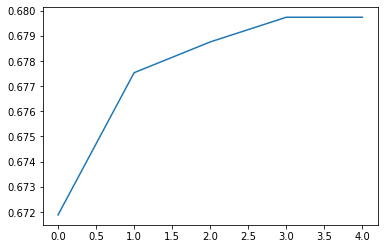

In [110]:
# График качества в зависимости от кол-ва признаков
plt.plot(dict_score_iv.values())

### Вариант 3. Отбор признаков на основе feature_impotance от алгоритма RandomForest

In [95]:
array = data.values
x = array[:,0:54] # dataframe --> массив numpy
y = array[:,54]
# извлечение признаков
model = ExtraTreesClassifier()
model.fit(x, y) # обучение
for i in range(len(data.columns)-1):
    print(f"{data.columns[i]}\t- {model.feature_importances_[i]:.4f}")

Elevation	- 0.1974
Aspect	- 0.0522
Slope	- 0.0372
Horizontal_Distance_To_Hydrology	- 0.0637
Vertical_Distance_To_Hydrology	- 0.0587
Horizontal_Distance_To_Roadways	- 0.1115
Hillshade_9am	- 0.0431
Hillshade_Noon	- 0.0454
Hillshade_3pm	- 0.0429
Horizontal_Distance_To_Fire_Points	- 0.1044
Wilderness_Area_0	- 0.0111
Wilderness_Area_1	- 0.0062
Wilderness_Area_2	- 0.0119
Wilderness_Area_3	- 0.0386
Soil_Type_0	- 0.0018
Soil_Type_1	- 0.0104
Soil_Type_2	- 0.0029
Soil_Type_3	- 0.0140
Soil_Type_4	- 0.0007
Soil_Type_5	- 0.0032
Soil_Type_6	- 0.0001
Soil_Type_7	- 0.0001
Soil_Type_8	- 0.0002
Soil_Type_9	- 0.0124
Soil_Type_10	- 0.0037
Soil_Type_11	- 0.0139
Soil_Type_12	- 0.0048
Soil_Type_13	- 0.0006
Soil_Type_14	- 0.0000
Soil_Type_15	- 0.0009
Soil_Type_16	- 0.0020
Soil_Type_17	- 0.0005
Soil_Type_18	- 0.0012
Soil_Type_19	- 0.0021
Soil_Type_20	- 0.0012
Soil_Type_21	- 0.0199
Soil_Type_22	- 0.0129
Soil_Type_23	- 0.0043
Soil_Type_24	- 0.0003
Soil_Type_25	- 0.0009
Soil_Type_26	- 0.0008
Soil_Type_27	- 0.0003

Самая значимая переменная Elevation и Horizontal_Distance_To_Roadways

In [103]:
# Отберем признаки со значением больше 0.01 + оставим Soil_Type и Wilderness_Area и посчитаем скор модели
cols_for = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_0',
       'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3',
       'Soil_Type_0', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3',
       'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7',
       'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11',
       'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15',
       'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19',
       'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23',
       'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27',
       'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31',
       'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35',
       'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39']

In [104]:
# Создадим словарь для сбора скоров
dict_score_for = {}

In [105]:
# Будем в цикле добавлять по 1-му признаку и считать скор
y = data['target']
col_for = []
for i in range (len(cols_for)):
    col_for.append(cols_for[i])
    dict_score_for[i] = get_score(data_new[col_for],y)

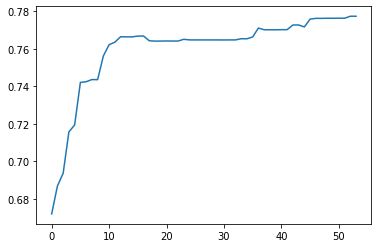

In [106]:
# График качества в зависимости от кол-ва признаков
plt.plot(dict_score_for.values())

### Вариант 4. Жадный отбор признаков по максимальному нарастанию качества модели

In [114]:
sfs_forward = SequentialFeatureSelector(DecisionTreeClassifier(max_depth=5), n_features_to_select = 3,
                                        direction ='forward').fit(data_new, y)

In [122]:
print("Features selected by forward sequential selection: "
      f"{np.array(cols)[sfs_forward.get_support()]}")

Features selected by forward sequential selection: ['Elevation' 'Aspect' 'Horizontal_Distance_To_Hydrology' 'Hillshade_Noon'
 'Soil_Type_1' 'Soil_Type_3' 'Soil_Type_37']


In [125]:
cols_sfs_forward = ['Elevation', 'Aspect', 'Horizontal_Distance_To_Hydrology', 'Hillshade_Noon',
 'Soil_Type_1', 'Soil_Type_3', 'Soil_Type_37']

In [126]:
# Создадим словарь для сбора скоров
dict_score_sfs_forward = {}

In [127]:
# Будем в цикле добавлять по 1-му признаку и считать скор
y = data['target']
col_sfs_forward = []
for i in range (len(cols_sfs_forward)):
    col_sfs_forward.append(cols_sfs_forward[i])
    dict_score_sfs_forward[i] = get_score(data_new[col_sfs_forward],y)

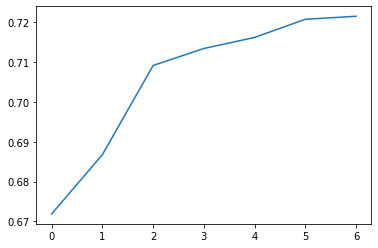

In [128]:
# График качества в зависимости от кол-ва признаков
plt.plot(dict_score_sfs_forward.values())

### Вариант 5. Жадное отбрасывание признаков по минимальному падению качества модели

In [132]:
SelectedColumns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                                        'Vertical_Distance_To_Hydrology', 
                                        'Horizontal_Distance_To_Roadways',
                                        'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                                        'Horizontal_Distance_To_Fire_Points']

In [134]:
# Взяла несколько признаков тк очень долго отрабатывает на всех 55 признаках
sfs_backward = SequentialFeatureSelector(DecisionTreeClassifier(max_depth=3), n_features_to_select = 3,
                                        direction ='backward').fit(data_new[SelectedColumns], y)
print("Features selected by backward sequential selection: "
      f"{np.array(SelectedColumns)[sfs_backward.get_support()]}")

Features selected by backward sequential selection: ['Elevation' 'Horizontal_Distance_To_Hydrology' 'Hillshade_9am']


In [135]:
cols_sfs_backward = ['Elevation', 'Aspect', 'Horizontal_Distance_To_Hydrology', 'Hillshade_9am']

In [136]:
# Создадим словарь для сбора скоров
dict_score_sfs_backward = {}

In [137]:
# Будем в цикле добавлять по 1-му признаку и считать скор
y = data['target']
col_sfs_backward = []
for i in range (len(cols_sfs_backward)):
    col_sfs_backward.append(cols_sfs_backward[i])
    dict_score_sfs_backward[i] = get_score(data_new[col_sfs_backward],y)

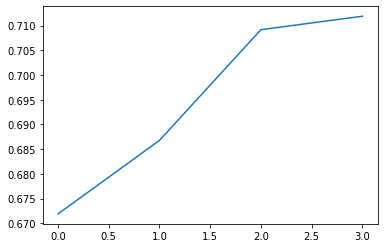

In [138]:
# График качества в зависимости от кол-ва признаков
plt.plot(dict_score_sfs_backward.values())